In [1]:
!pip install ht CoolProp fluids


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


In [1]:
%matplotlib widget
import numpy as np # linear algebra
import matplotlib.pyplot as plt
import ht,fluids,os
import CoolProp as cp
from IPython.display import Latex
from matplotlib.lines import Line2D
MK = Line2D.markers
mk = [mki for mki in MK.keys()][2:]

In [3]:
Tia= 160
Tsa = 300

G_a = 230e3/3600

Tig = 800

G_g = 500e3/3600

Tsg1 = Tia

Trg = (Tsg1+Tig)/2
Tra = (Tia+Tsa)/2

Cp_w = cp.CoolProp.PropsSI('C','T',T_wm1+273,'P',101.3e3,'Water')
Pr_w1 = cp.CoolProp.PropsSI('Prandtl','T',T_wm1+273,'P',101.3e3,'Water')
mu_w1 = cp.CoolProp.PropsSI('V','T',T_wm1+273,'P',101.3e3,'Water')
rho_w1 = cp.CoolProp.PropsSI('D','T',T_wm1+273,'P',101.3e3,'Water')
k_w1 = cp.CoolProp.PropsSI('L','T',T_wm1+273,'P',101.3e3,'Water')


Cp_w = cp.CoolProp.PropsSI('C','T',T_wm1+273,'P',101.3e3,'Water')
Pr_w1 = cp.CoolProp.PropsSI('Prandtl','T',T_wm1+273,'P',101.3e3,'Water')
mu_w1 = cp.CoolProp.PropsSI('V','T',T_wm1+273,'P',101.3e3,'Water')
rho_w1 = cp.CoolProp.PropsSI('D','T',T_wm1+273,'P',101.3e3,'Water')
k_w1 = cp.CoolProp.PropsSI('L','T',T_wm1+273,'P',101.3e3,'Water')
nu_w1 = mu_w1/rho_w1
a_w1 = nu_w1 / Pr_w1

Cp_ac = 1480
C_ac = m_ac*Cp_ac

In [13]:
U1 = 52
U2 = 38

In [40]:
Q1 = Cp_ac*m_ac* (T_ac_in1-T_ac_out1)
Q2 = Cp_ac*m_ac* (T_ac_in2-T_ac_out2)

#Cp_w*m_w * (T_w_out2-T_w_out1) = Q1
#Cp_w*m_w * (T_w_out1-T_w_in1) = Q2
#Cp_w*m_w * (T_w_out2-T_w_in1) = Q1+Q2
m_w = (Q1+Q2)/(Cp_w*(T_w_out2-T_w_in1))
T_w_out11 = Q2/(Cp_w*m_w  )+T_w_in1

In [4]:
ht.DBundle_for_Ntubes_Phadkeb?

Signature: ht.DBundle_for_Ntubes_Phadkeb(Ntubes, Do, pitch, Ntp, angle=30)
Docstring:
Determine the bundle diameter required to fit a specified number of
tubes in a heat exchanger. Uses the highly accurate method of [1]_,
which takes into account pitch, number of tube passes, angle,
and tube diameter. The method is analytically correct when used in the
other direction (calculating number of tubes from bundle diameter); in
reverse, it is solved by bisection.

Parameters
----------
Ntubes : int
    Total number of tubes that fit in the heat exchanger, [-]
Do : float
    Tube outer diameter, [m]
pitch : float
    Pitch; distance between two orthogonal tube centers, [m]
Ntp : int
    Number of tube passes, [-]
angle : float, optional
    The angle the tubes are positioned; 30, 45, 60 or 90, [degrees]

Returns
-------
DBundle : float
    Outer diameter of tube bundle, [m]

Notes
-----
This function will fail when there are more than 100,000 tubes. There are
a range of correct diameters for 

In [43]:
print(Q1/1e3,Q2/1e3)

763.68 381.84


In [58]:
Qmax1 = (T_ac_in1-T_w_out11)*C_ac

Qmax2 = (T_ac_in2-T_w_in1)*C_ac


eps1 = Q1/Qmax1
eps2 = Q2/Qmax2
print(eps1,eps2)
Cr = C_ac / Cp_w/m_w

0.6370370370370371 0.6231884057971014


In [64]:
Nut1 = ht.NTU_from_effectiveness(eps1,Cr)
Nut2 = ht.NTU_from_effectiveness(eps2,Cr)

A1 = Nut1 *U1/ (C_ac)
A2 = Nut2 *U2/ C_ac
print(A1,A2)

0.007248132310240152 0.005070038307802891


In [65]:
Nut1

1.2377579791333182

In [232]:
hrad = ((T_c+273)+(T_a+273))* ((T_c+273)**2+(T_a+273)**2) *sigma_sb*epsilon_c
Qrad = sigma_sb*((T_c+273)**4-(T_a+273)**4)*L * 2
Qrad2 = hrad*(T_c-T_a)*2*L

htotal = (hrad**-1+hconvf**-1)**-1
display(Latex(f'$h_{{total}}={htotal:.1f}$W/m$^2$'))

<IPython.core.display.Latex object>

In [191]:
from scipy.special import erfc

In [192]:
def theta (x,a,t,hc,k):
    z = x/(4*a*t)**0.5
    z2 = hc/k*(a*t)**0.5
    arg = hc*x/k+(hc/k)**2*a*t
    return erfc(z)-np.exp(arg)*erfc(z+z2)
    

In [2]:
ht.thermo.saturation

AttributeError: module ht has no attribute thermo

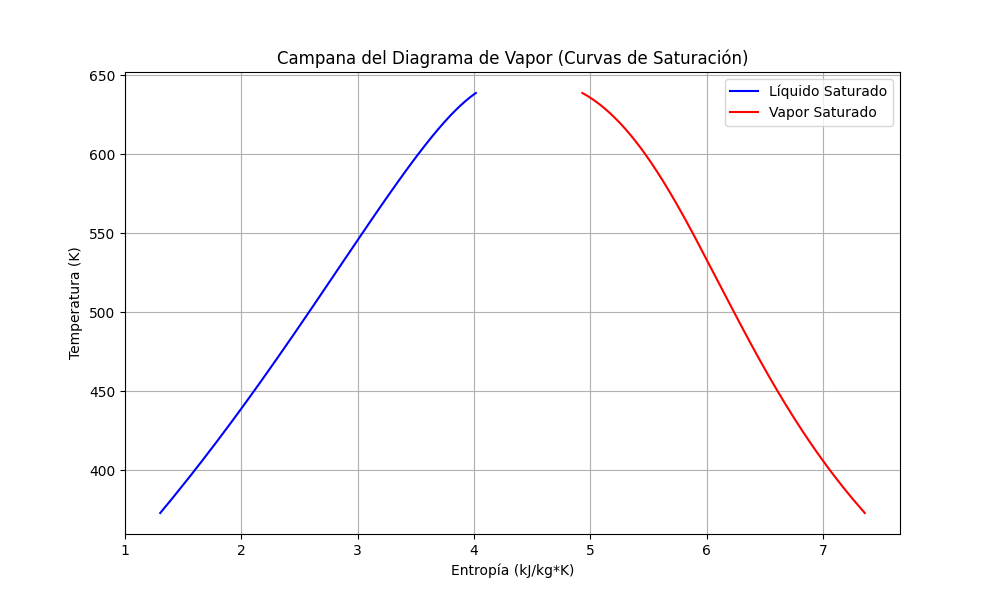

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import CoolProp.CoolProp as CP

# Definir un rango de presiones para las isobaras (en Pa)
presiones = np.linspace(1e5, 2e7, 500)  # Rango de presiones de 0.1 bar a 200 bar

# Calcular la temperatura de saturación y entropía para líquido y vapor saturado
T_liquido = [CP.PropsSI('T', 'P', p, 'Q', 0, 'Water') for p in presiones]  # Líquido saturado
T_vapor = [CP.PropsSI('T', 'P', p, 'Q', 1, 'Water') for p in presiones]    # Vapor saturado
s_liquido = [CP.PropsSI('S', 'P', p, 'Q', 0, 'Water') / 1000 for p in presiones]  # Entropía líquida saturada (kJ/kg*K)
s_vapor = [CP.PropsSI('S', 'P', p, 'Q', 1, 'Water') / 1000 for p in presiones]    # Entropía vapor saturado (kJ/kg*K)

# Graficar la campana del diagrama de vapor (curvas de saturación de líquido y vapor)
plt.figure(figsize=(10, 6))

plt.plot(s_liquido, T_liquido, label="Líquido Saturado", color='blue')  # Curva de líquido saturado
plt.plot(s_vapor, T_vapor, label="Vapor Saturado", color='red')  # Curva de vapor saturado

# Añadir detalles al gráfico
plt.title("Campana del Diagrama de Vapor (Curvas de Saturación)")
plt.xlabel("Entropía (kJ/kg*K)")
plt.ylabel("Temperatura (K)")
plt.grid(True)
plt.legend()

plt.show()


In [6]:
s

NameError: name 's' is not defined